In [1]:
from sklearn.externals import joblib
(A,terms,snippets) = joblib.load( "articles-tfidf.pkl" )
print( "Loaded %d X %d document-term matrix" % (A.shape[0], A.shape[1]) )

Loaded 2150 X 3139 document-term matrix


In [2]:
k = 10

In [3]:
# create the model
from sklearn import decomposition
model = decomposition.NMF( init="nndsvd", n_components=k ) 
# apply the model and extract the two factor matrices
W = model.fit_transform( A )
H = model.components_

In [4]:
W.shape

(2150, 10)

In [5]:
# round to 2 decimal places for display purposes
W[0,:].round(2)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [6]:
H.shape

(10, 3139)

In [9]:
import numpy as np
def get_descriptor( terms, H, topic_index, top ):
    # reverse sort the values to sort the indices
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    # now get the terms corresponding to the top-ranked indices
    top_terms = []
    for term_index in top_indices[0:top]:
        top_terms.append( terms[term_index] )
    return top_terms

In [10]:
descriptors = []
for topic_index in range(k):
    descriptors.append( get_descriptor( terms, H, topic_index, 10 ) )
    str_descriptor = ", ".join( descriptors[topic_index] )
    print("Topic %02d: %s" % ( topic_index+1, str_descriptor ) )

Topic 01: mobile, phone, digital, technology, people, phones, tv, video, games, music
Topic 02: club, chelsea, united, arsenal, league, game, liverpool, cup, manager, play
Topic 03: labour, election, blair, party, brown, government, minister, howard, prime, chancellor
Topic 04: film, best, award, awards, festival, actor, oscar, films, actress, director
Topic 05: growth, economy, economic, prices, sales, bank, 2004, rate, rates, dollar
Topic 06: yukos, company, firm, shares, oil, deal, russian, market, deutsche, stock
Topic 07: software, microsoft, users, virus, search, security, people, mail, net, computer
Topic 08: champion, world, olympic, open, race, indoor, final, australian, seed, win
Topic 09: england, wales, ireland, france, game, robinson, rugby, nations, half, coach
Topic 10: music, band, album, chart, rock, show, number, song, top, singer


In [11]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
matplotlib.rcParams.update({"font.size": 14})

In [13]:
def plot_top_term_weights( terms, H, topic_index, top ):
    # get the top terms and their weights
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    top_terms = []
    top_weights = []
    for term_index in top_indices[0:top]:
        top_terms.append( terms[term_index] )
        top_weights.append( H[topic_index,term_index] )
    # note we reverse the ordering for the plot
    top_terms.reverse()
    top_weights.reverse()
    # create the plot
    fig = plt.figure(figsize=(13,8))
    # add the horizontal bar chart
    ypos = np.arange(top)
    ax = plt.barh(ypos, top_weights, align="center", color="green",tick_label=top_terms)
    plt.xlabel("Term Weight",fontsize=14)
    plt.tight_layout()
    plt.show()

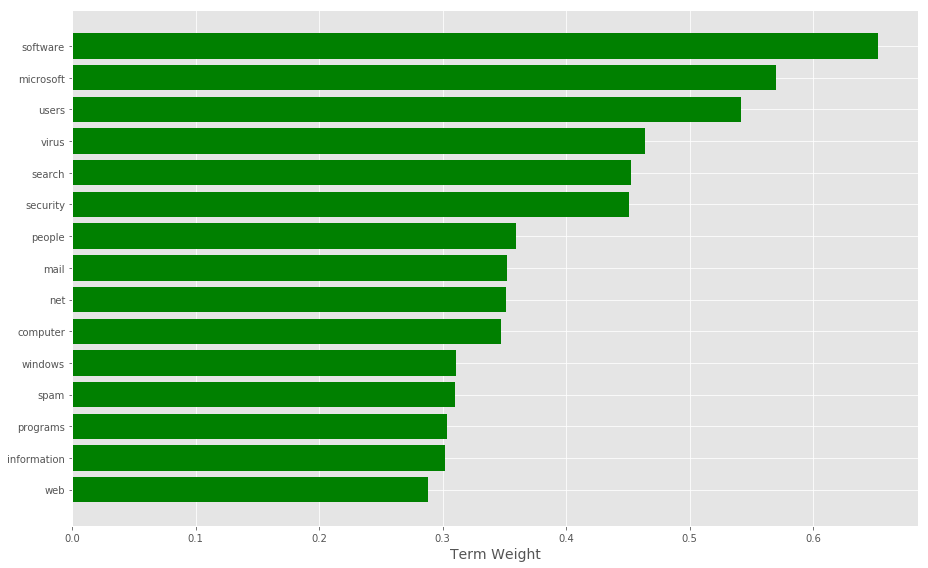

In [14]:
plot_top_term_weights( terms, H, 6, 15 )

In [15]:
def get_top_snippets( all_snippets, W, topic_index, top ):
    # reverse sort the values to sort the indices
    top_indices = np.argsort( W[:,topic_index] )[::-1]
    # now get the snippets corresponding to the top-ranked indices
    top_snippets = []
    for doc_index in top_indices[0:top]:
        top_snippets.append( all_snippets[doc_index] )
    return top_snippets

In [16]:
topic_snippets = get_top_snippets( snippets, W, 0, 10 )
for i, snippet in enumerate(topic_snippets):
    print("%02d. %s" % ( (i+1), snippet ) )

01. Mobiles 'not media players yet' Mobiles are not yet ready to be all-singing, all-dancing multimedia 
02. Mobiles 'not media players yet' Mobiles are not yet ready to be all-singing, all-dancing multimedia 
03. Mobiles rack up 20 years of use Mobile phones in the UK are celebrating their 20th anniversary this 
04. Mobiles rack up 20 years of use Mobile phones in the UK are celebrating their 20th anniversary this 
05. The future in your pocket If you are a geek or gadget fan, the next 12 months look like they are goi
06. Half of UK's mobiles 'go online' Multimedia mobile phones are finally showing signs of taking off, w
07. Mobile TV tipped as one to watch Scandinavians and Koreans, two of the most adventurous groups of mo
08. Lifestyle 'governs mobile choice' Faster, better or funkier hardware alone is not going to help phon
09. Lifestyle 'governs mobile choice' Faster, better or funkier hardware alone is not going to help phon
10. Looks and music to drive mobiles Mobile phones are 

In [17]:
topic_snippets = get_top_snippets( snippets, W, 1, 10 )
for i, snippet in enumerate(topic_snippets):
    print("%02d. %s" % ( (i+1), snippet ) )

01. Mourinho defiant on Chelsea form Chelsea boss Jose Mourinho has insisted that Sir Alex Ferguson and 
02. FA decides not to punish Mourinho The Football Association will take no action against Chelsea boss 
03. Mourinho plots impressive course Chelsea's win at Fulham - confirming their position at the Premiers
04. Desailly backs Blues revenge trip Marcel Desailly insists there is no chance of history repeating it
05. Desailly backs Blues revenge trip Marcel Desailly insists there is no chance of history repeating it
06. Gerrard plays down European hopes Steven Gerrard has admitted that Liverpool have little chance of w
07. Redknapp's Saints face Pompey tie New Southampton manager Harry Redknapp faces an immediate reunion 
08. Liverpool pledge to keep Gerrard Liverpool chief executive Rick Parry insists the club will never se
09. Yeading face Newcastle in FA Cup Premiership side Newcastle United face a trip to Ryman Premier Leag
10. Brentford v Southampton Griffin Park Tuesday, 1 Mar

In [18]:
joblib.dump((W,H,terms,snippets), "articles-model-nmf-k%02d.pkl" % k) 

['articles-model-nmf-k10.pkl']